In [1]:
import sys
sys.path.append('src')
from src import helperfunctions as hf
from src import SABR
from src.SABR_IV_approximators import AntonovANN, AntonovApprox, Hagan

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LinearLocator
import pandas as pd
import numpy as np

# suppress all numpy warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
save_path = r"C:\Users\hugo\OneDrive\Documents\Quantitative Finance\Thesis\Plots"
colors = ['#d7191c','#fdae61','#abd9e9','#2c7bb6']

### Short term plot

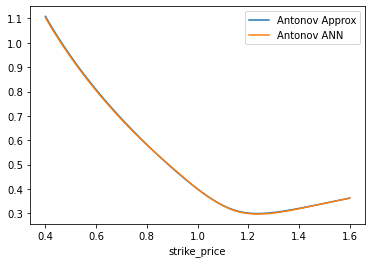

In [3]:
T = 10/365
alpha = .4
beta = .5
rho = -.7
v = 2
fit = SABR.plot_SABR([AntonovApprox(), AntonovANN()], alpha, beta, rho, v, T, strike_step=.01)
fit = fit.set_index('strike_price')

fit['error'] = np.abs(fit['Antonov ANN'] - fit['Antonov Approx']) / np.abs(fit['Antonov Approx'])
# fit['error'] = (fit['Antonov Approx'] - fit['Antonov ANN']) * 100*100

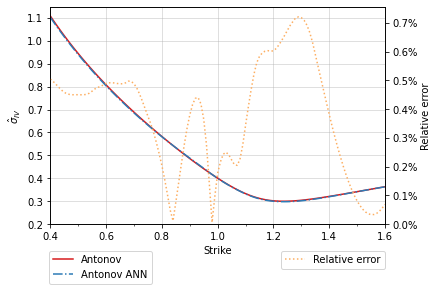

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.plot(fit['Antonov Approx'], color=colors[0], label='Antonov')
ax.plot(fit['Antonov ANN'], color=colors[3], ls='-.', label='Antonov ANN')

ax2.plot(fit['error'], color=colors[1], ls=':', label='Relative error')

ax.set_ylabel('$\hat{\sigma}_{IV}$')
ax2.set_ylabel('Relative error')
# ax2.set_ylim(0,.0075)

ax2.set_ylim(0,None)
# nticks=9
ax.yaxis.set_major_locator(MultipleLocator(.1))
# ax2.yaxis.set_major_locator(LinearLocator(nticks))

# plt.xlabel('Strike')
# plt.ylabel('$\hat{\sigma}_{IV}$')
ax.set_ylim(.2,None)
yvals = ax2.get_yticks()
ax2.set_yticklabels(["{:,.1%}".format(y) for y in yvals])

plt.xlim(.4,1.6)
ax.set_xlabel('Strike')

labels = ['Antonov', 'Antonov ANN']
ax.legend(loc=9, bbox_to_anchor=(0.15, -0.1), ncol=1)
ax2.legend(loc=9, bbox_to_anchor=(0.845, -0.1), ncol=1)

ax.xaxis.set_minor_locator(MultipleLocator(.1))

ax.grid(alpha=.5)

# plt.savefig(save_path + '/example_plot_short_term.eps', bbox_inches='tight')


### Long term plot

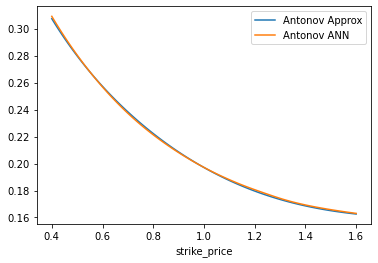

In [9]:
T = 9.5
alpha = .2
beta = .5
rho = -.5
v = .3
fit = SABR.plot_SABR([AntonovApprox(), AntonovANN()], alpha, beta, rho, v, T, strike_step=.01)
fit = fit.set_index('strike_price')
fit['error'] = np.abs(fit['Antonov ANN'] - fit['Antonov Approx']) / np.abs(fit['Antonov Approx'])
fit['error_bps'] = (fit['Antonov ANN'] -fit['Antonov Approx']) * 100 * 100

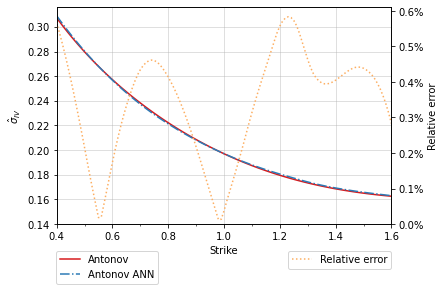

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.plot(fit['Antonov Approx'], color=colors[0], label='Antonov')
ax.plot(fit['Antonov ANN'], color=colors[3], ls='-.', label='Antonov ANN')

ax2.plot(fit['error'], color=colors[1], ls=':', label='Relative error')

ax.set_ylabel('$\hat{\sigma}_{IV}$')
ax2.set_ylabel('Relative error')
# ax2.set_ylim(0,.0075)

# plt.xlabel('Strike')
# plt.ylabel('$\hat{\sigma}_{IV}$')

plt.xlim(.4,1.6)

ax.set_ylim(.14,None)
ax2.set_ylim(0,None)
yvals = ax2.get_yticks()
ax2.set_yticklabels(["{:,.1%}".format(y) for y in yvals])

labels = ['Antonov', 'Antonov ANN']
ax.legend(loc=9, bbox_to_anchor=(0.15, -0.1), ncol=1)
ax2.legend(loc=9, bbox_to_anchor=(0.845, -0.1), ncol=1)
ax.set_xlabel('Strike')

ax.xaxis.set_minor_locator(MultipleLocator(.1))


ax.grid(alpha=.5)

# plt.savefig(save_path + '/example_plot_longterm.eps', bbox_inches='tight')
